In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from cordova_plugins import d_plugins
import matplotlib.pyplot as plt
import seaborn as sns


# Import Dataset

In [2]:
df_api = pd.read_csv("../db/cdv/cordova_API.csv")
df_permission = pd.read_csv("../db/cdv/cordova_PERMISSION.csv")
# df_feature = pd.read_csv("../db/fcordova/eatures.csv")


In [3]:
df_api.columns

Index(['apk_name', 'battery-status', 'camera', 'contacts', 'device', 'dialogs',
       'file', 'geolocation', 'globalization', 'inappbrowser', 'media',
       'media-capture', 'network-information', 'splashscreen', 'statusbar',
       'vibration'],
      dtype='object')

In [4]:
l_api = list(df_api.columns)
l_permission = df_permission.columns

In [5]:
l_api

['apk_name',
 'battery-status',
 'camera',
 'contacts',
 'device',
 'dialogs',
 'file',
 'geolocation',
 'globalization',
 'inappbrowser',
 'media',
 'media-capture',
 'network-information',
 'splashscreen',
 'statusbar',
 'vibration']

In [6]:
"successCallback" in l_api

False

In [7]:
df_api

,apk_name,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,com.pr.ojectblue.dothis,13,33,41,7,2,5,8,0,0,1,2,5,0,0,0
1,com.indiageeks.apk,13,9,75,1,13,1,1,1,0,94,1,5,1,0,0
2,com.koimoi.android,13,8,75,4,2,8,1,1,0,94,1,11,1,0,0
3,com.activitylabs.bankbluffer,13,6,78,8,1,7,4,0,0,98,0,1,0,0,0
4,prayerguide.thegagne.com,0,17,37,7,3,5,8,0,0,1,2,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,sportstables.com,13,8,75,1,2,8,1,1,0,94,1,11,1,0,0
658,com.phonegap.tip,0,9,19,1,2,5,1,0,0,12,2,0,0,0,0
659,com.ugliapps.iheartfruits,12,3,45,3,0,6,0,0,0,74,0,1,0,0,0
660,sunnyappz.thesecretquotes,13,6,74,8,0,8,0,0,0,98,0,5,0,0,0


# Analyse API calls

## The occurances

### The occurances of funcitons detected for each plugin in each APK

In [8]:
df_plugins_only = df_api.drop(columns=["apk_name"])
df_plugins_only

,battery-status,camera,contacts,device,dialogs,file,geolocation,globalization,inappbrowser,media,media-capture,network-information,splashscreen,statusbar,vibration
0,13,33,41,7,2,5,8,0,0,1,2,5,0,0,0
1,13,9,75,1,13,1,1,1,0,94,1,5,1,0,0
2,13,8,75,4,2,8,1,1,0,94,1,11,1,0,0
3,13,6,78,8,1,7,4,0,0,98,0,1,0,0,0
4,0,17,37,7,3,5,8,0,0,1,2,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,13,8,75,1,2,8,1,1,0,94,1,11,1,0,0
658,0,9,19,1,2,5,1,0,0,12,2,0,0,0,0
659,12,3,45,3,0,6,0,0,0,74,0,1,0,0,0
660,13,6,74,8,0,8,0,0,0,98,0,5,0,0,0


### The occurance of plugins for entire dataset

In [9]:
total_apk = df_plugins_only.shape[0]
print(f"Total APKs: {total_apk}")
df_cnt = df_plugins_only.astype(bool).sum(axis=0).sort_values(ascending=False)
df_cnt

Total APKs: 662


device                 571
media                  565
contacts               559
camera                 555
file                   535
network-information    531
battery-status         503
dialogs                442
geolocation            426
media-capture          286
splashscreen           241
globalization          189
statusbar               20
inappbrowser             0
vibration                0
dtype: int64

In [10]:
# percentage of apks using each plugin
df_pct = df_cnt.apply(lambda x: round(x/total_apk*100, 2))
df_pct

device                 86.25
media                  85.35
contacts               84.44
camera                 83.84
file                   80.82
network-information    80.21
battery-status         75.98
dialogs                66.77
geolocation            64.35
media-capture          43.20
splashscreen           36.40
globalization          28.55
statusbar               3.02
inappbrowser            0.00
vibration               0.00
dtype: float64

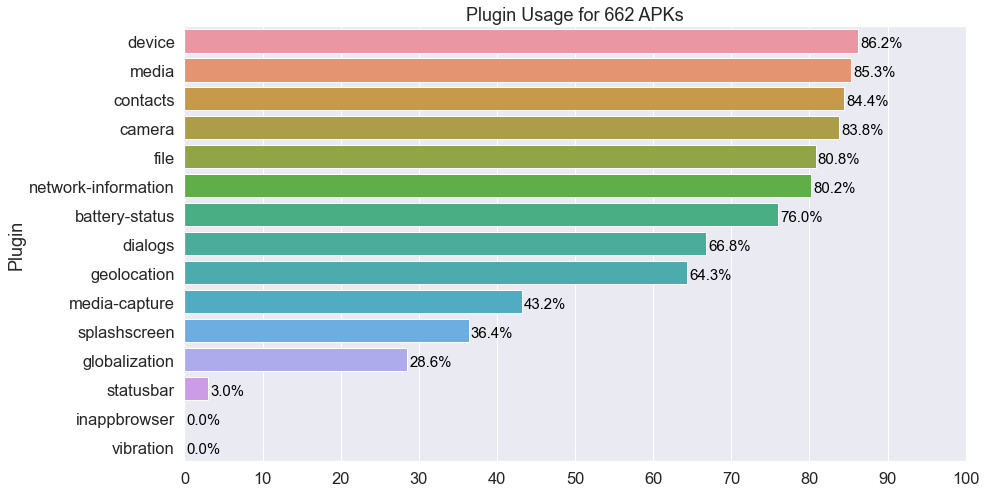

In [20]:
plt.figure(figsize=(14, 8))
sns.set(font_scale=1.5) # font size 2
sns_pct = sns.barplot(x=df_pct.values, y=df_pct.index)
# sns_pct.set_xticklabels(sns_pct.get_xticklabels(), rotation=45, horizontalalignment='right')
sns_pct.set_xticks(range(0, 101, 10))
plt.xlabel("")
plt.ylabel("Plugin")
plt.title(f"Plugin Usage for {total_apk} APKs")
for p in sns_pct.patches:
#     print(p)
    sns_pct.annotate(
        "{:.1%}".format(p.get_width()/100), 
        (p.get_width(), p.get_y() + p.get_height()),
        fontsize=15, 
        color='black', 
        xytext=(2, 5),
        textcoords='offset points')

plt.show()

## Heatmap

### Heatmap for Entire database

Text(0.5, 1.0, 'The occurances of funcitons detected for each plugin in each APK')

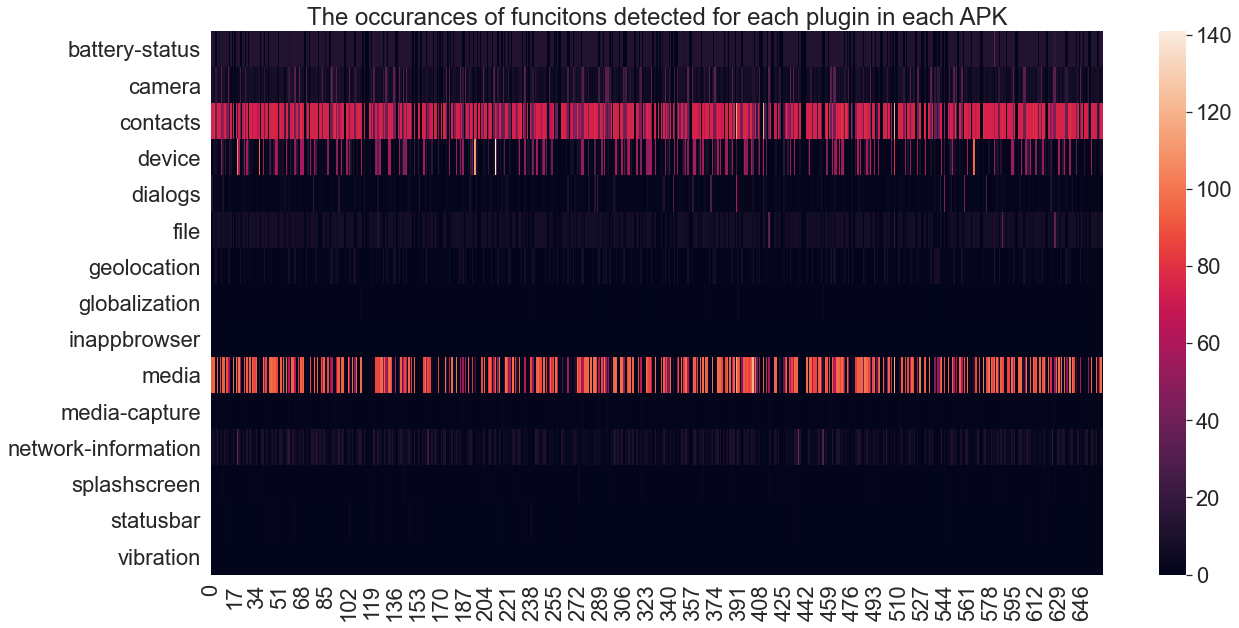

In [21]:
df_plugins_only_T = df_plugins_only.T    # transpose
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T)
plt.title("The occurances of funcitons detected for each plugin in each APK")

### Heatmap for a small set of dataset

Text(0.5, 1.0, 'The occurances of funcitons detected for each plugin in each APK')

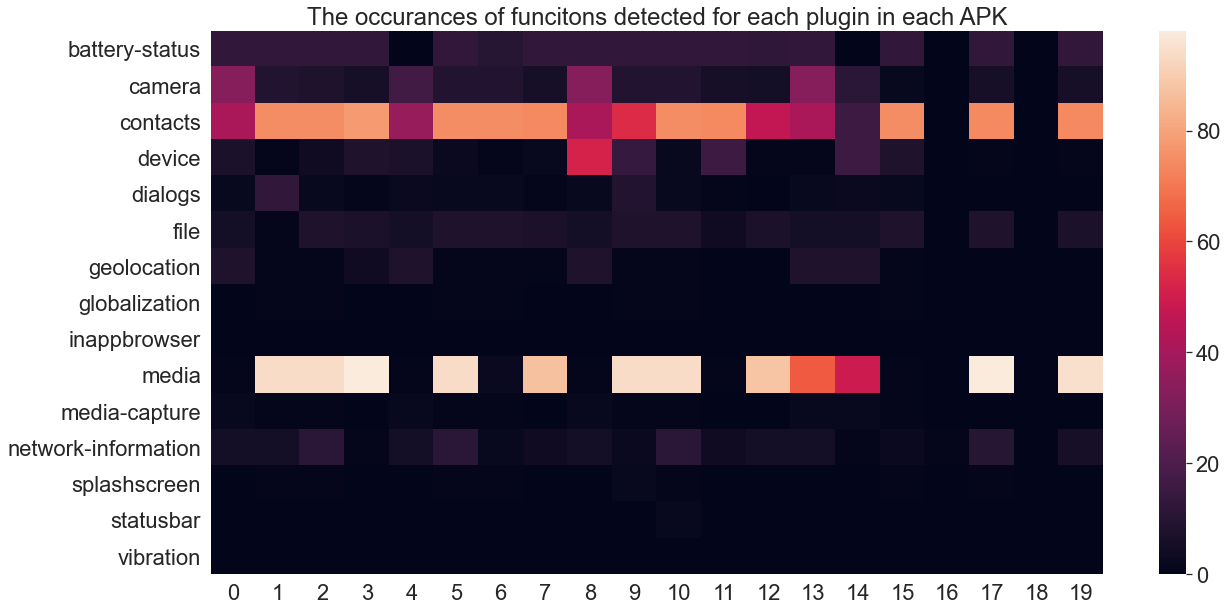

In [22]:
# select a set of apks, originial
set_num = 20
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num])
plt.title("The occurances of funcitons detected for each plugin in each APK")

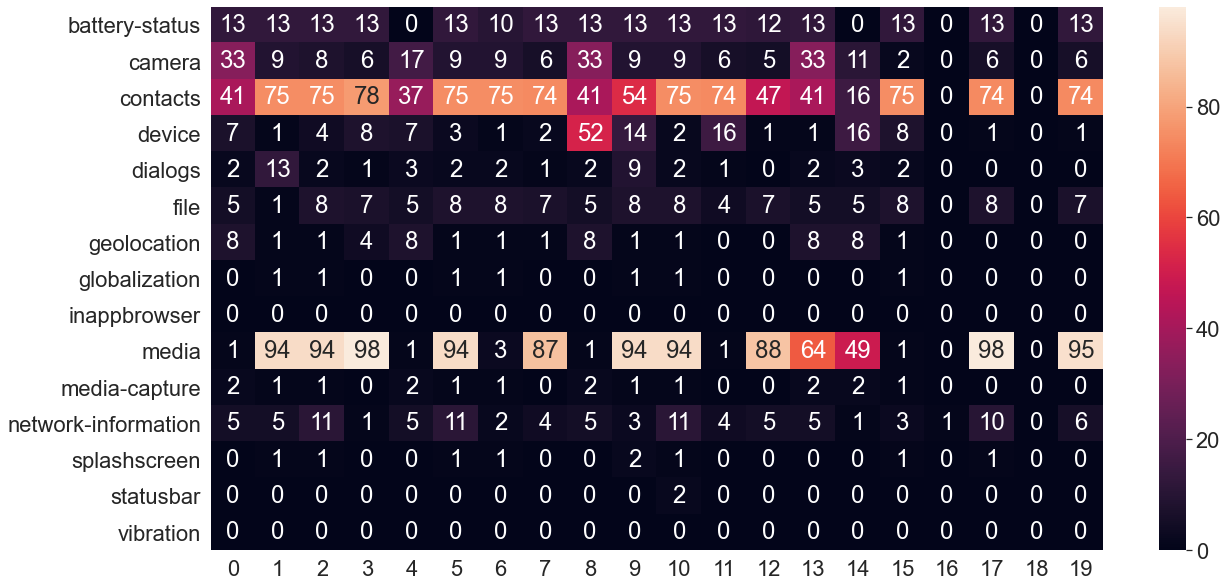

In [14]:
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_only_T.iloc[:, :set_num], annot=True)

### Heatmap without media and device

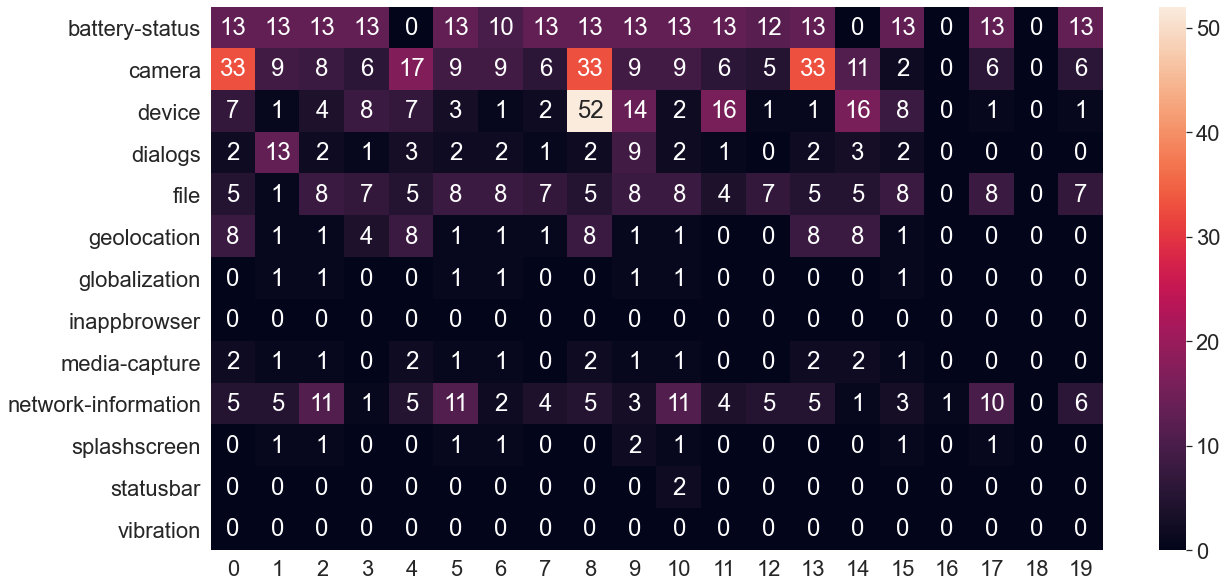

In [16]:

df_plugins_media = df_api.drop(columns=["apk_name", "media", "contacts"])
df_plugins_media_T = df_plugins_media.T
# select a set of apks, heatmap with annotation
plt.figure(figsize=(20,10))
sns.set(font_scale=2) # font size 2
ax = sns.heatmap(df_plugins_media_T.iloc[:, :set_num], annot=True)